In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('Data set\election2024.csv')

In [21]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [23]:
# Display summary statistics
df.describe(include='all')


,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
count,1600,1600,1600.000000,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,692,879,1600.000000
unique,1600,2,NaN,8,7,4,6,7,6,6,6,6,11,6,21,NaN
top,07169ed8148ce047,female,NaN,central,city with population of 100-500k,named correct date,definitely yes,Putin,less than 4 hours a day,less than 4 hours a day,college,medium,work for hire,commercial organization,"industry, manufacturing",NaN
freq,1,843,NaN,425,391,1361,1062,1128,490,613,690,949,535,445,138,NaN
mean,NaN,NaN,49.936250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
std,NaN,NaN,16.901797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327084
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468226
25%,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772224
50%,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921724
75%,NaN,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.158913


In [24]:
# Check for missing values
df.isnull().sum()


id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [25]:
# Example: Fill missing values
df.fillna(method='ffill', inplace=True)


In [26]:
# Check the number of null values in 'job_type'
null_count = df['job_type'].isnull().sum()
print(f'Number of null values in job_type: {null_count}')

Number of null values in job_type: 1


In [27]:
# Find the most frequent job title
most_frequent_job_title = df['job_type'].mode()[0]
print(f'The most frequent job title is: {most_frequent_job_title}')

The most frequent job title is: commercial organization


In [28]:
# Fill null values with the most frequent job title
df['job_type'].fillna(most_frequent_job_title, inplace=True)


In [29]:
df.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

Insight: There is no any null value 

In [31]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

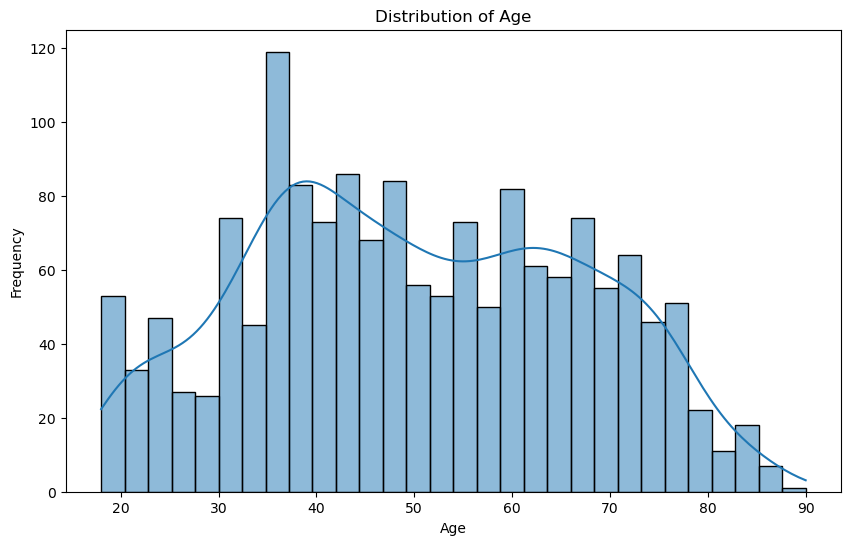

In [34]:
# Create a histogram plot for the specified column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title(f'Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

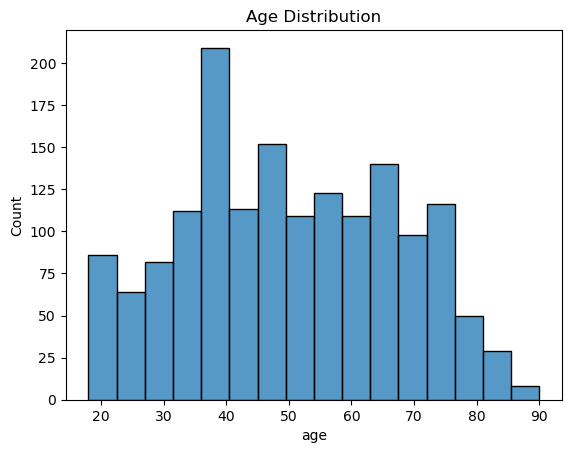

In [39]:
# Distribution of Age
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

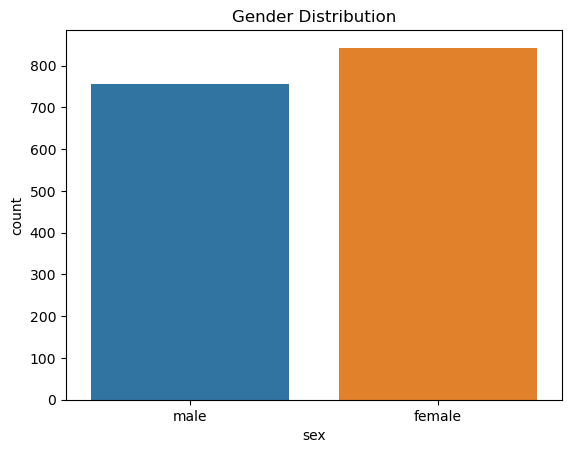

In [40]:
# Gender Distribution
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

Insight: If one gender shows a higher propensity to vote, focus campaign efforts on the gender that is less likely to vote.

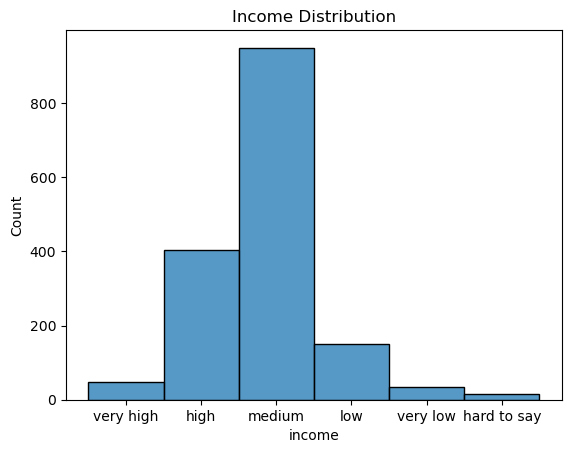

In [41]:
# Income Distribution
sns.histplot(df['income'])
plt.title('Income Distribution')
plt.show()

Insight: If income level correlates with voting intent, tailor messages to address the concerns or interests of different income brackets.

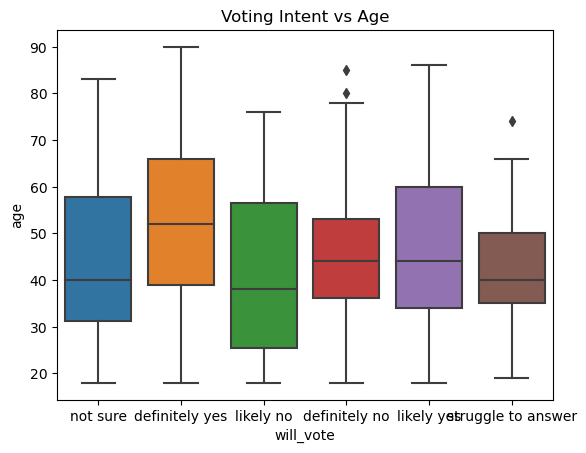

In [42]:
# Voting Intent by Age
sns.boxplot(x='will_vote', y='age', data=df)
plt.title('Voting Intent vs Age')
plt.show()

Insight: This plot will help you identify which candidates are more popular in specific federal districts, guiding targeted campaign efforts.

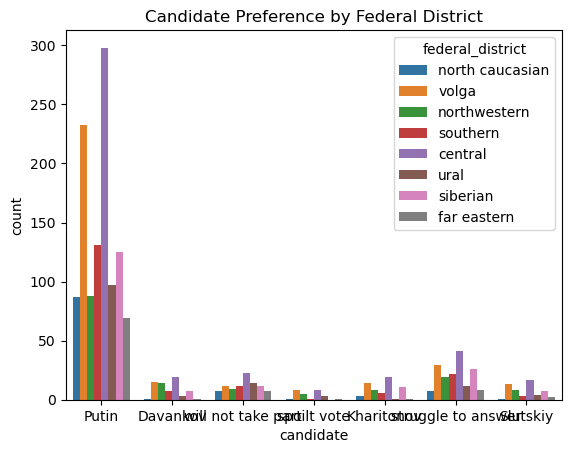

In [43]:
# Candidate Preference by Federal District
sns.countplot(x='candidate', hue='federal_district', data=df)
plt.title('Candidate Preference by Federal District')
plt.show()

C:\Users\py9pr\AppData\Local\Temp\ipykernel_22396\791970042.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[['age', 'income', 'television_usage', 'internet_usage', 'weight1']].corr()


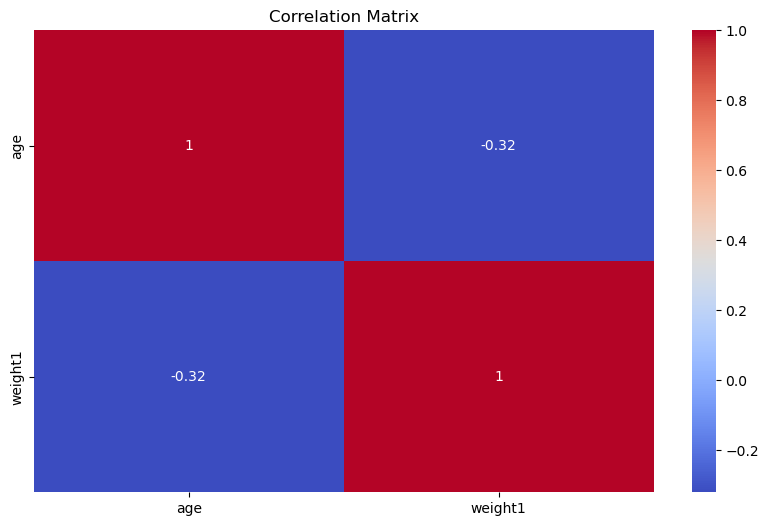

In [44]:
# Check correlation with Weight
plt.figure(figsize=(10, 6))
correlation = df[['age', 'income', 'television_usage', 'internet_usage', 'weight1']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insight: Correlation analysis helps understand if weight1 significantly impacts other variables. Adjustments may be needed based on the analysis.